In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import scipy.stats as stats

In [3]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import distance_modules as d
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)
importlib.reload(d)

<module 'distance_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\distance_modules.py'>

In [4]:
sample_size, nr_sample_sets = 1000, 20
bounded_dists = dm.get_bounded_distribution()
heavytail_dists = dm.get_heavytail_distribution()

bounded_samples = dm.get_samples(bounded_dists, nr_sample_sets, sample_size)
bounded_samples_st = dm.get_st_samples(bounded_dists, nr_sample_sets, sample_size)

heavytail_samples = dm.get_samples(heavytail_dists, nr_sample_sets, sample_size, transform=True)
heavytail_samples_st = dm.get_st_samples(heavytail_dists, nr_sample_sets, sample_size, transform=True)

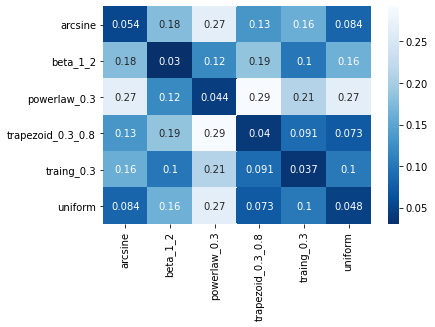

In [5]:
original_d, original_std = d.w_distance(bounded_samples)
d.plot_matrix(original_d, bounded_samples.iloc[:,-1].unique())

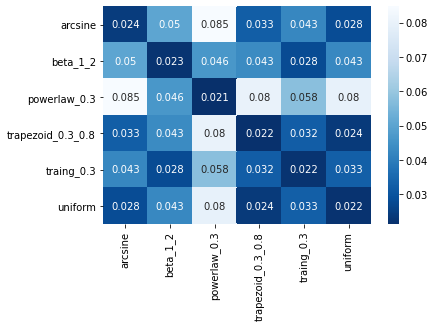

In [335]:
original_d, original_std = d.w_distance(bounded_samples_st)
d.plot_matrix(original_d, st_bounded_samples.iloc[:,-1].unique())

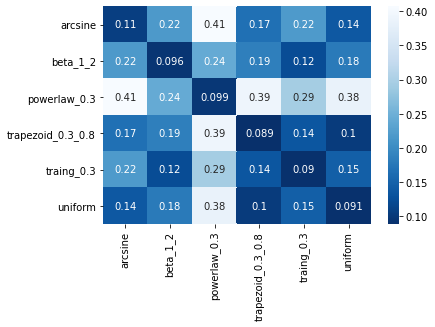

(1.0, 0.0)

In [7]:
nr_moments = 4
moments_df = dem.get_moments(st_bounded_samples, nr_moments)
moments_d, moments_std = d.w_distance(st_bounded_samples)
d.plot_matrix(moments_d, st_bounded_samples.iloc[:,-1].unique())
d.corr_coef(original_d,moments_d)

### Moments approach

In [31]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
nr_moments_list = list(range(2,21))

In [32]:
# bounded
moments_res = d.cv_samplesize_moments(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

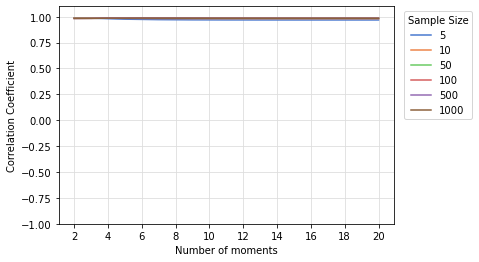

In [33]:
d.plot_cv_moments(moments_res)

In [34]:
# standardized bounded
moments_st_res = d.cv_samplesize_moments(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets, standardize = True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

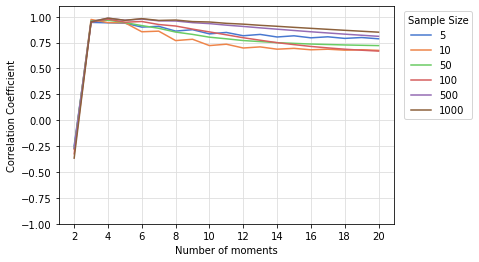

In [35]:
d.plot_cv_moments(moments_st_res)

In [36]:
# heavytailed
moments_ht_res = d.cv_samplesize_moments(sample_size_list, nr_moments_list, heavytail_dists, nr_sample_sets)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

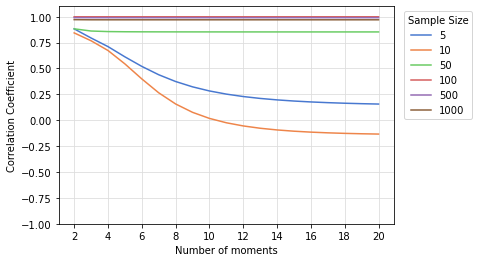

In [37]:
d.plot_cv_moments(moments_ht_res)

In [38]:
# standardized heavytailed
moments_ht_st_res = d.cv_samplesize_moments(sample_size_list, nr_moments_list, heavytail_dists, nr_sample_sets, standardize=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

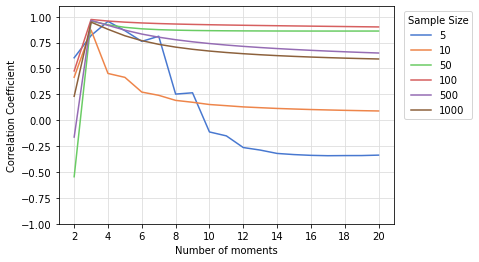

In [39]:
d.plot_cv_moments(moments_ht_st_res)

In [40]:
# heavytailed
moments_ht_res_t = d.cv_samplesize_moments(sample_size_list, nr_moments_list, heavytail_dists, nr_sample_sets, transform = True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

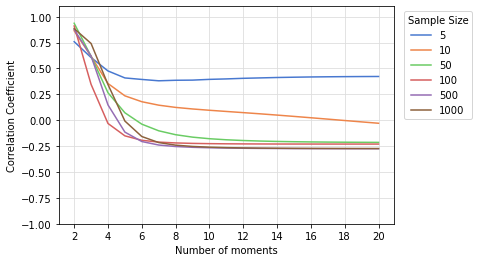

In [41]:
d.plot_cv_moments(moments_ht_res_t)

In [42]:
# standardized heavytailed
moments_ht_st_res_t = d.cv_samplesize_moments(sample_size_list, nr_moments_list, heavytail_dists, nr_sample_sets, transform = True, standardize = True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

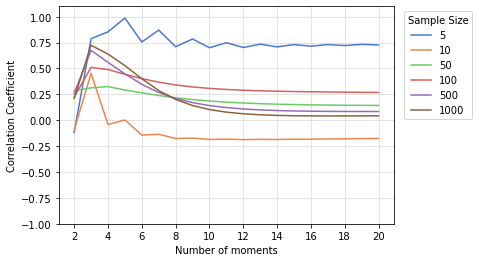

In [43]:
d.plot_cv_moments(moments_ht_st_res_t)

In [44]:
moments_res.to_csv('results/moments/corr_distance_bounded.csv')
moments_st_res.to_csv('results/moments/corr_distance_bounded_st.csv')
moments_ht_res.to_csv('results/moments/corr_distance_heavytail.csv')
moments_ht_st_res.to_csv('results/moments/corr_distance_heavytail_st.csv')

### KDE

In [5]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
num_steps_list = list(np.arange(2,21))

In [6]:
# Bounded
kde_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample_sets, 'kde')

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

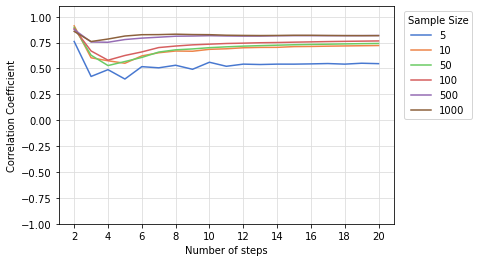

In [13]:
d.plot_cv_numsteps_samplesize(kde_res)

In [18]:
# Standardize bounded
kde_st_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample_sets, 'kde', standardize=True)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

In [20]:
kde_st_res

,corr_coef,p_value,num_steps,sample_size
0,0.933809,9.628531e-17,2,5
1,0.961462,1.210813e-20,3,5
2,0.940886,1.488370e-17,4,5
3,0.920880,1.807454e-15,5,5
4,0.911153,1.202134e-14,6,5
...,...,...,...,...
109,0.888182,4.997666e-13,16,1000
110,0.887936,5.177864e-13,17,1000
111,0.887706,5.351394e-13,18,1000
112,0.887513,5.501546e-13,19,1000


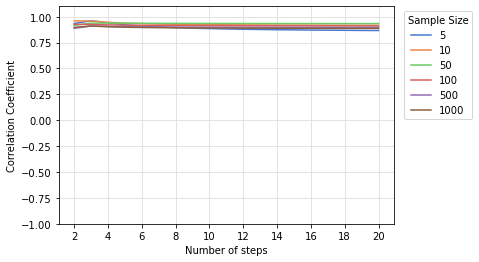

In [19]:
d.plot_cv_numsteps_samplesize(kde_st_res)

In [12]:
# Heavytailed
kde_ht_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, heavytail_dists, nr_sample_sets, 'kde', transform=True)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

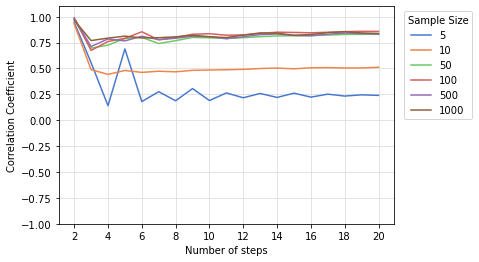

In [14]:
d.plot_cv_numsteps_samplesize(kde_ht_res)

In [16]:
# Standardize heavy tailed
kde_ht_st_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, heavytail_dists, nr_sample_sets, 'kde', transform=True, standardize=True)

% completed:   0%|          | 0/6 [00:00<?, ?it/s]

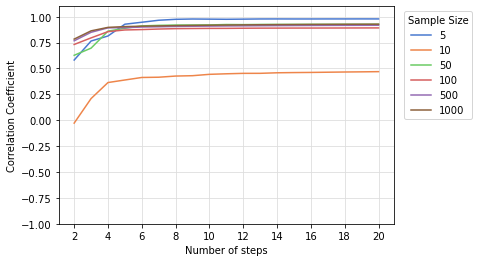

In [17]:
d.plot_cv_numsteps_samplesize(kde_ht_st_res)

In [297]:
kde_res.to_csv('results/kde/corr_distance_bounded.csv')
kde_st_res.to_csv('results/kde/corr_distance_bounded_st.csv')
kde_ht_res.to_csv('results/kde/corr_distance_heavytail.csv')
kde_ht_st_res.to_csv('results/kde/corr_distance_heavytail_st.csv')

### EDF

In [76]:
bounded_samples_st

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,0.755617,0.105334,0.570368,0.659863,0.484615,0.195165,0.179035,0.706998,0.111264,0.052209,...,0.226856,0.133340,0.681798,0.273507,0.378355,0.730214,0.427347,0.205963,0.412961,arcsine
1,0.563094,0.745347,0.037694,0.406624,0.765904,0.656566,0.544217,0.082978,0.262797,0.679845,...,0.692443,0.155259,0.042490,0.540768,0.203689,0.576938,0.788748,0.256236,0.075524,arcsine
2,0.736131,0.653074,0.259062,0.684059,0.350498,0.213124,0.680440,0.643635,0.380763,0.730907,...,0.687552,0.264562,0.380366,0.724137,0.642860,0.485452,0.610591,0.049536,0.175927,arcsine
3,0.673421,0.182922,0.722806,0.448343,0.727224,0.188478,0.152741,0.421193,0.429441,0.848246,...,0.200587,0.152738,0.014843,0.119141,0.696794,0.294158,0.778176,0.314410,0.166717,arcsine
4,0.107860,0.636192,0.556883,0.579514,0.739590,0.424419,0.351122,0.451391,0.501556,0.884721,...,0.115810,0.105179,0.515558,0.070910,0.282572,0.638735,0.122558,0.369199,0.330362,arcsine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.432662,0.638476,0.082470,0.414120,0.793981,0.412807,0.792540,0.545524,0.011151,0.178913,...,0.700452,0.607627,0.322497,0.601869,0.549118,0.619198,0.687431,0.463214,0.137853,uniform
116,0.568375,0.360662,0.715990,0.621042,0.390604,0.555902,0.485754,0.178472,0.612630,0.831188,...,0.327853,0.598861,0.630168,0.398351,0.528576,0.057333,0.124452,0.397348,0.210246,uniform
117,0.154137,0.165608,0.188946,0.270531,0.665935,0.165429,0.538540,0.168991,0.488792,0.019711,...,0.716048,0.225544,0.005618,0.345519,0.375220,0.498550,0.237519,0.473037,0.285311,uniform
118,0.570126,0.738580,0.056175,0.599309,0.064071,0.048001,0.148937,0.091951,0.709089,0.050413,...,0.395251,0.154156,0.376262,0.508562,0.362300,0.463022,0.145938,0.755912,0.501045,uniform


In [83]:
x = np.linspace(0,1,2)
x

array([0., 1.])

In [89]:
df1 = dem.get_edf(bounded_samples,x)
df1

,0,1,label
0,0.0,1.0,arcsine
1,0.0,1.0,arcsine
2,0.0,1.0,arcsine
3,0.0,1.0,arcsine
4,0.0,1.0,arcsine
...,...,...,...
115,0.0,1.0,uniform
116,0.0,1.0,uniform
117,0.0,1.0,uniform
118,0.0,1.0,uniform


In [90]:
df2 = dem.get_edf(bounded_samples_st,x)
df2

,0,1,label
0,0.00,1.0,arcsine
1,0.00,1.0,arcsine
2,0.00,1.0,arcsine
3,0.00,1.0,arcsine
4,0.01,1.0,arcsine
...,...,...,...
115,0.01,1.0,uniform
116,0.00,1.0,uniform
117,0.01,1.0,uniform
118,0.01,1.0,uniform


In [87]:
df

,0,1,label
0,0.00,1.0,arcsine
1,0.00,1.0,arcsine
2,0.00,1.0,arcsine
3,0.00,1.0,arcsine
4,0.01,1.0,arcsine
...,...,...,...
115,0.01,1.0,uniform
116,0.00,1.0,uniform
117,0.01,1.0,uniform
118,0.01,1.0,uniform


In [61]:
edf_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, 'edf')

% completed:   0%|          | 0/7 [00:00<?, ?it/s]

C:\Users\shfar\anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


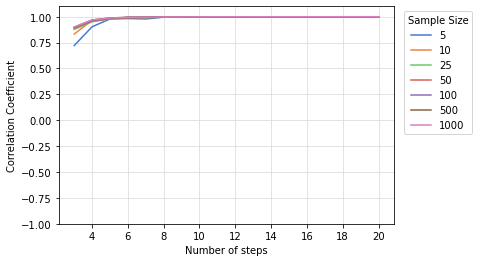

In [70]:
d.plot_cv_numsteps_samplesize(edf_res)

In [63]:
edf_st_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample, 'edf', standardize=True)

% completed:   0%|          | 0/7 [00:00<?, ?it/s]

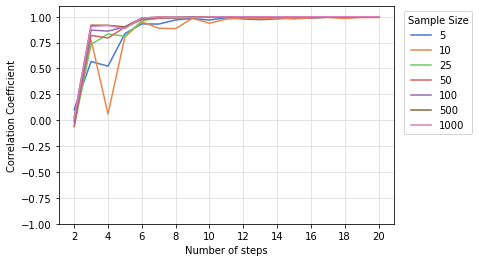

In [71]:
d.plot_cv_numsteps_samplesize(edf_st_res)

In [64]:
# heavytail
edf_ht_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, heavytail_dists, nr_sample, 'edf', transform=True)

% completed:   0%|          | 0/7 [00:00<?, ?it/s]

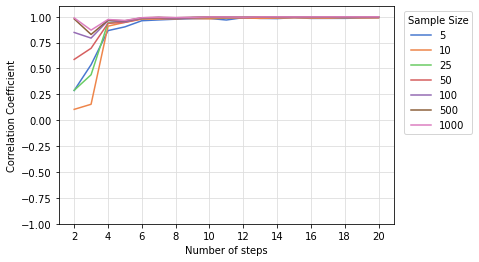

In [72]:
d.plot_cv_numsteps_samplesize(edf_ht_res)

In [65]:
edf_ht_st_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, heavytail_dists, nr_sample, 'edf', transform=True, standardize=True)

% completed:   0%|          | 0/7 [00:00<?, ?it/s]

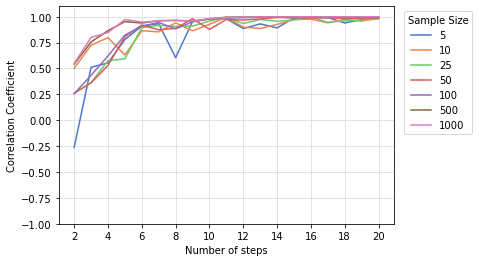

In [73]:
d.plot_cv_numsteps_samplesize(edf_ht_st_res)

### ECF

In [66]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
num_steps_list = np.arange(1,21)
max_t_list = [1, np.pi, 5, 10, 50, 100, 500]

In [67]:
ecf_res = d.cv_ecf(sample_size_list, max_t_list, num_steps_list, bounded_dists, nr_sample)

  0%|          | 0/7 [00:00<?, ?it/s]

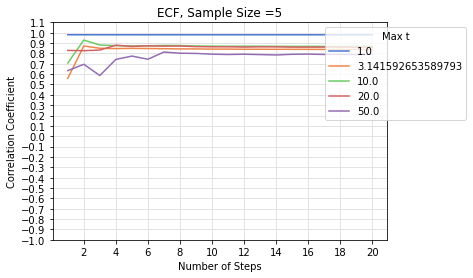

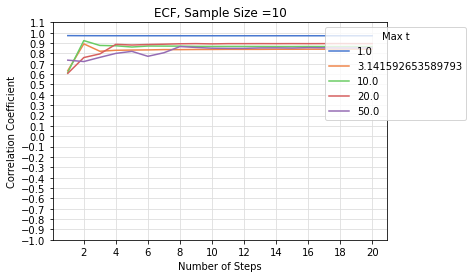

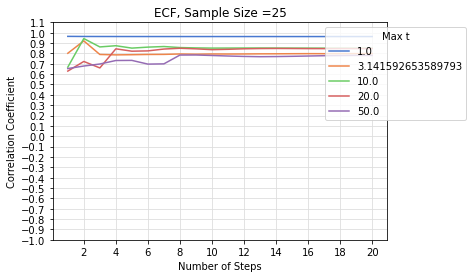

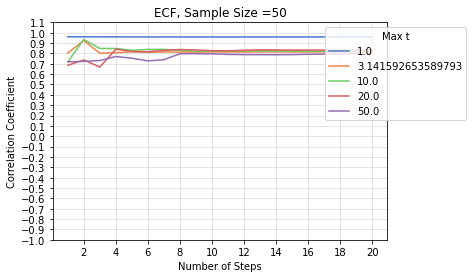

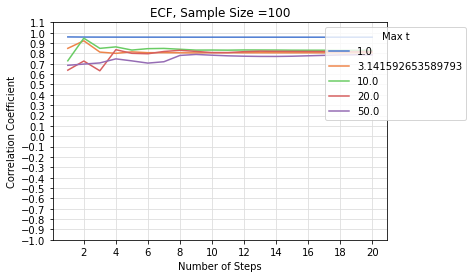

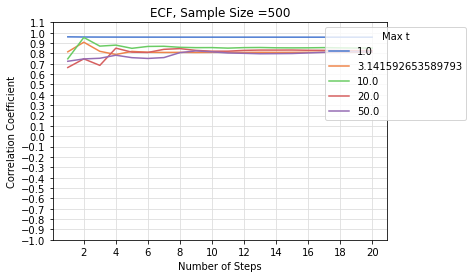

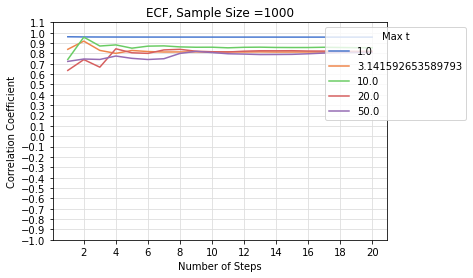

In [342]:
d.plot_cv_ecf(ecf_res)

In [91]:
ecf_st_res = d.cv_ecf(sample_size_list, max_t_list, num_steps_list, bounded_dists, nr_sample, standardize=True)

  0%|          | 0/7 [00:00<?, ?it/s]

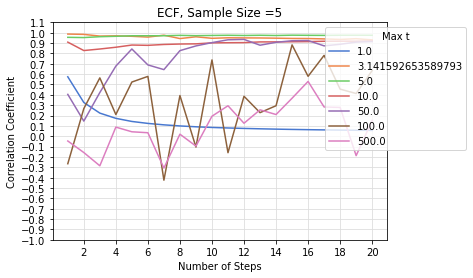

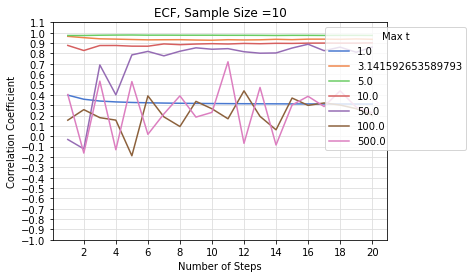

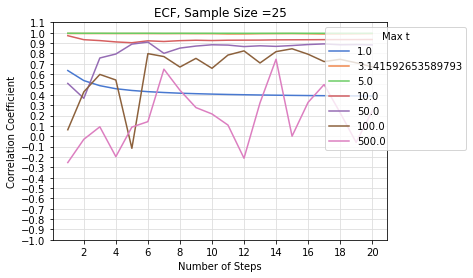

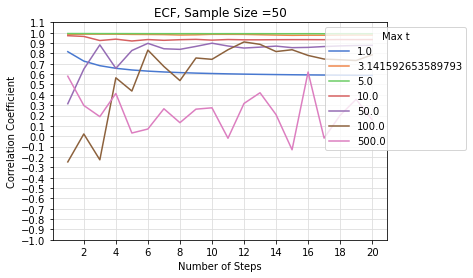

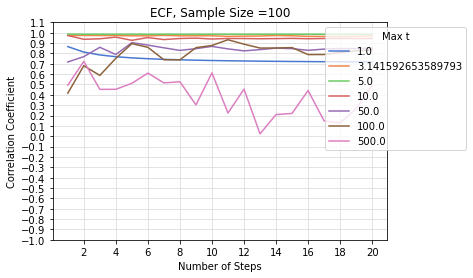

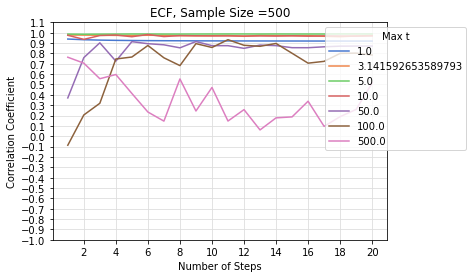

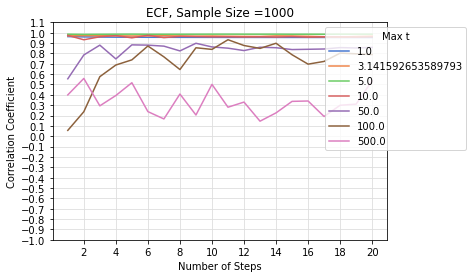

In [93]:
d.plot_cv_ecf(ecf_st_res)